In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#4.Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [5]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


#5. How many rows and columns are in gdp_df? What are the data types of each column?

In [7]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]


In [8]:
#6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df = gdp_df.drop('Value Footnotes', axis='columns').rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [10]:
#7.How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [11]:
countries= gdp_df.groupby('Country')['Year'].count()

In [12]:
countries= countries.reset_index()

In [13]:
countries= countries.rename(columns={'Year' :'count_of_year'})

In [14]:
countries= countries.rename(columns={'Year' :'count_of_year'})

In [15]:
countries[countries['count_of_year']<33].count()

Country          40
count_of_year    40
dtype: int64

In [16]:
#8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [17]:
gdp_2020 = gdp_df[gdp_df['Year']==2020]

Text(0.5, 1.0, 'Histogram Per GDP Per Capita')

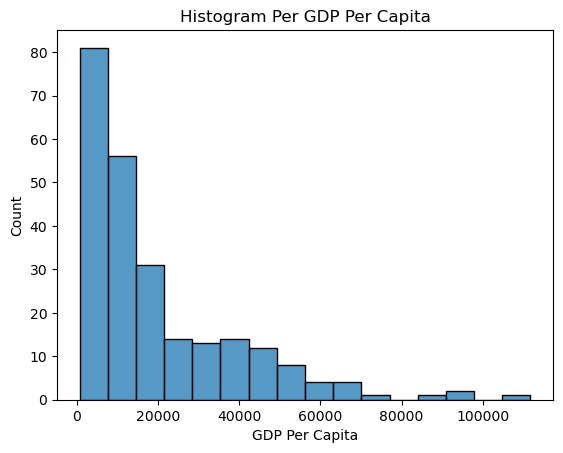

In [18]:
sns.histplot(data= gdp_2020, x = 'GDP_Per_Capita')
plt.xlabel('GDP Per Capita')
plt.title('Histogram Per GDP Per Capita')

Text(0.5, 1.0, 'Density Plot for GDP Per Capita')

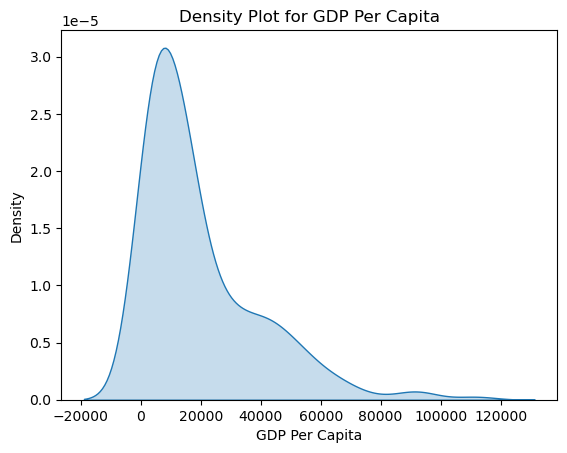

In [19]:
sns.kdeplot(data= gdp_2020, x = 'GDP_Per_Capita', fill = 'skyblue')
plt.xlabel('GDP Per Capita')
plt.title('Density Plot for GDP Per Capita')

Text(0.5, 1.0, 'Box Plot for GDP Per Capita')

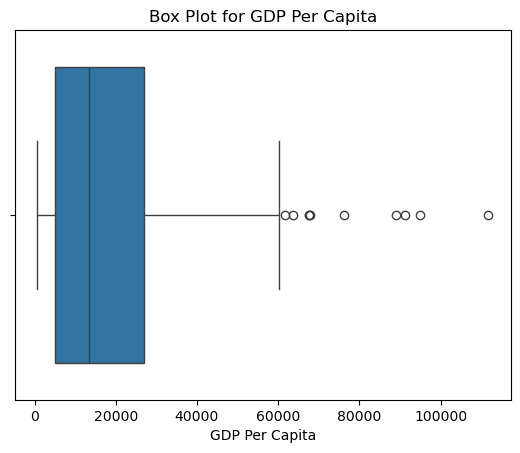

In [20]:
sns.boxplot(data= gdp_2020, x = 'GDP_Per_Capita')
plt.xlabel('GDP Per Capita')
plt.title('Box Plot for GDP Per Capita')

Text(0.5, 1.0, 'Violin Plot for GDP Per Capita')

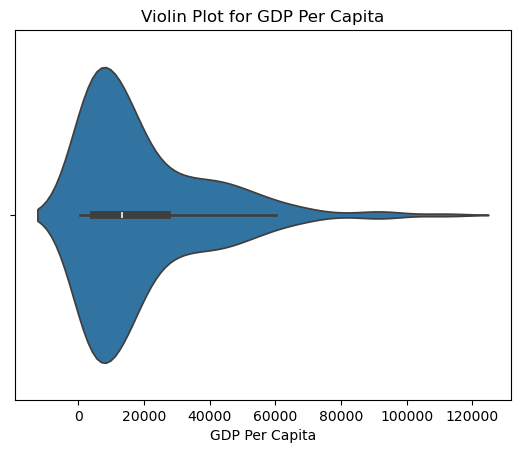

In [21]:
sns.violinplot(data= gdp_2020, x = 'GDP_Per_Capita')
plt.xlabel('GDP Per Capita')
plt.title('Violin Plot for GDP Per Capita')

In [22]:
#9. What was the median GDP per capita value in 2020?

In [23]:
gdp_2020['GDP_Per_Capita'].median()

13357.997573370474

In [24]:
#10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots


In [25]:
my_years= [1990,2000,2010,2020]

In [26]:
my_years

[1990, 2000, 2010, 2020]

In [27]:
gdp_df['Year'].isin(my_years)

0       False
1        True
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661     True
Name: Year, Length: 7662, dtype: bool

In [28]:
gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [29]:
gdp_decades = gdp_df[gdp_df['Year'].isin(my_years)]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

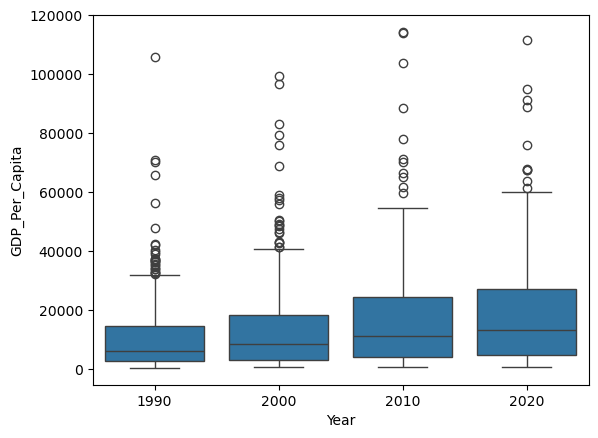

In [30]:
# box plot
sns.boxplot(data = gdp_decades,
           x='Year',
           y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

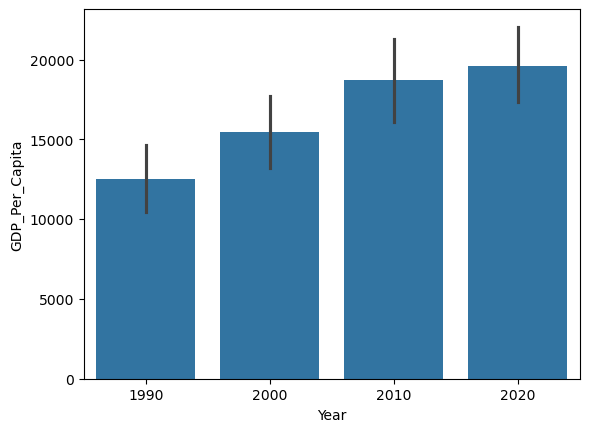

In [31]:
# bar plot
sns.barplot(data = gdp_decades,
           x='Year',
           y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

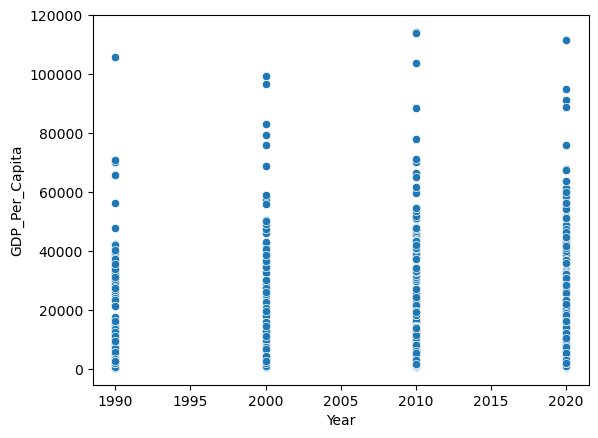

In [32]:
sns.scatterplot(data=gdp_decades,
               x='Year',
               y='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

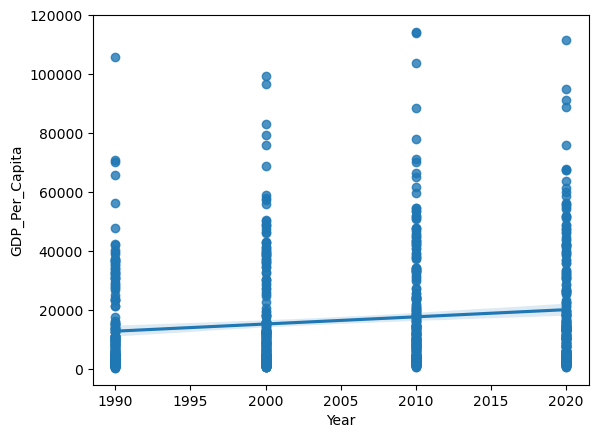

In [33]:
sns.regplot(data = gdp_decades, 
            x = 'Year', 
            y = 'GDP_Per_Capita')

In [34]:
##Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [35]:
#11.Which country was the first to have a GDP per capita greater than $100,000?

In [36]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year').head()

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098


In [37]:
#12.Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


In [38]:
gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [39]:
gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')['Country'].tolist()[0]

'Luxembourg'

In [40]:
top_country= gdp_df[gdp_df['Country']=='Luxembourg']

In [41]:
top_country

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


<Axes: xlabel='Year'>

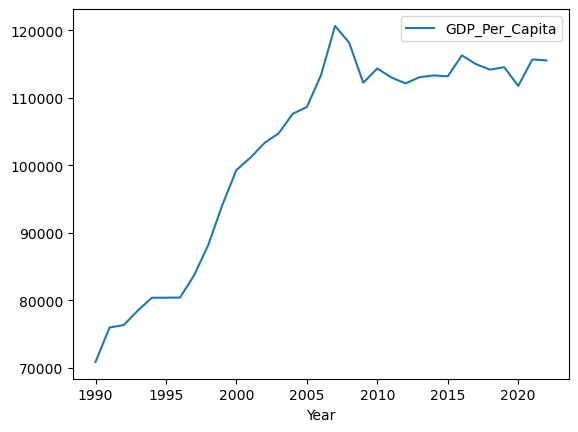

In [42]:
top_country.plot(x='Year', y='GDP_Per_Capita', kind='line')

In [43]:
#13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


In [44]:
gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [45]:
gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')['Country'].tolist()[0]

'Burundi'

In [46]:
bottom_country= gdp_df[gdp_df['Country']=='Burundi']

In [47]:
bottom_country

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


<Axes: xlabel='Year'>

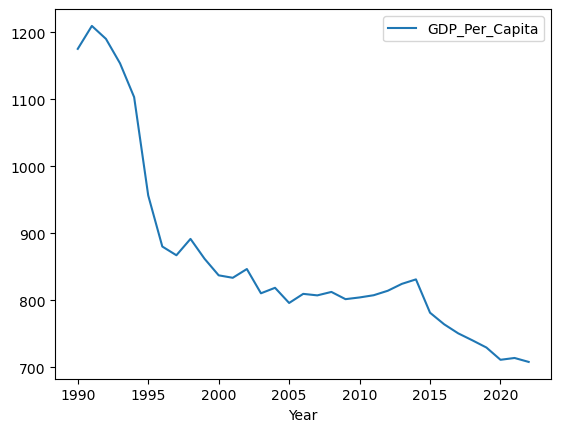

In [48]:
bottom_country.plot(x='Year', y='GDP_Per_Capita', kind='line')

In [49]:
#14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [50]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=6083)

In [51]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [52]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [53]:
#15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [54]:
internet_df = internet_df.drop('Value Footnotes', axis='columns').rename(columns={'Country or Area': 'Country', 'Year' :'Year', 'Value': 'Internet_Users_Pct'})

In [55]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [56]:
#16.Look at the number of observations in this dataset per year. What do you notice?

In [57]:
 internet_df.groupby('Year').size().sort_values(ascending=True)

Year
2023     11
1991     39
1992     50
1993     66
1994     92
1995    141
2018    174
1996    177
2022    184
2019    185
2021    186
2020    186
1997    188
1998    195
2013    203
2015    203
2014    204
2017    205
2016    206
1999    207
2003    208
2010    209
2012    209
2004    210
2000    210
2006    212
2005    212
2001    212
2009    214
2008    214
2002    214
2011    214
2007    217
1990    226
dtype: int64

In [58]:
#17. What is the first year to have a non-zero internet users percentage value?

In [59]:
internet_df[internet_df['Internet_Users_Pct']>0].sort_values('Year')

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


In [60]:
#18. How does the distribution of internet users percent differ for 2000 and 2014?

In [61]:
data_2000 = internet_df[internet_df['Year'] == 2000]

In [62]:
data_2000

,Country,Year,Internet_Users_Pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400
...,...,...,...
5974,Virgin Islands (US),2000,13.815100
5994,Wallis and Futuna,2000,4.768070
6017,Yemen,2000,0.082500
6045,Zambia,2000,0.191072


In [63]:
data_2014 = internet_df[internet_df['Year'] == 2014]

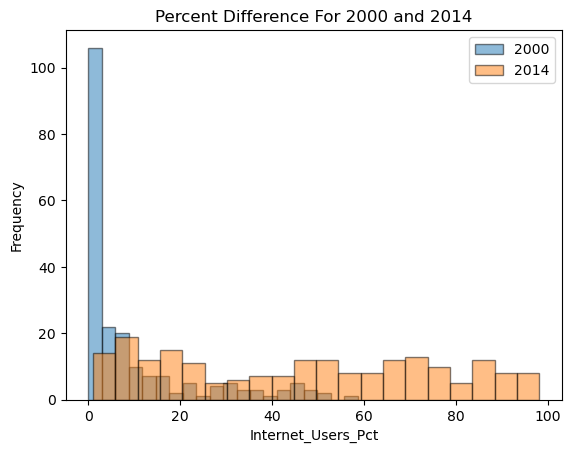

In [64]:
plt.hist(data_2000['Internet_Users_Pct'], bins=20, alpha=0.5, label='2000', edgecolor='black')
plt.hist(data_2014['Internet_Users_Pct'], bins=20, alpha=0.5, label='2014', edgecolor='black')
plt.xlabel('Internet_Users_Pct')
plt.ylabel('Frequency')
plt.title('Percent Difference For 2000 and 2014')
plt.legend()

In [65]:
#19. For how many countries was the percentage of internet users below 5% in 2014?

In [66]:
internet_df[(internet_df['Internet_Users_Pct']<5) & (internet_df['Year'] == 2014)]

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [67]:
#20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [68]:
gdp_and_internet_use = gdp_df.merge(internet_df, how="outer",on=["Country","Year"]) 

In [69]:
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  1990             NaN            0.000000
1     Afghanistan  2001             NaN            0.004723
2     Afghanistan  2002     1280.463171            0.004561
3     Afghanistan  2003     1292.333437            0.087891
4     Afghanistan  2004     1260.060581            0.105809
...           ...   ...             ...                 ...
9107     Zimbabwe  2018     2399.621551           25.000000
9108     Zimbabwe  2019     2203.396810           26.588300
9109     Zimbabwe  2020     1990.319419           29.298600
9110     Zimbabwe  2021     2115.144555           32.461600
9111     Zimbabwe  2022     2143.237574           32.561500

[9112 rows x 4 columns]


In [70]:
#21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [71]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values(by='Internet_Users_Pct', ascending=False)

In [72]:
print(gdp_and_internet_use_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
3820                      Iceland  2014    50450.741612             98.1580
2780  Falkland (Malvinas) Islands  2014             NaN             97.6000
794                       Bermuda  2014    77361.104881             96.8000
6243                       Norway  2014    62838.515727             96.3005
2100                      Denmark  2014    52048.335493             95.9935
...                           ...   ...             ...                 ...
8450     Turks and Caicos Islands  2014    24661.145053                 NaN
8516                     TÃ¼rkiye  2014    24600.518215                 NaN
8746          Upper middle income  2014    14063.487284                 NaN
8978           West Bank and Gaza  2014     5967.073437                 NaN
9011                        World  2014    15120.730322                 NaN

[284 rows x 4 columns]


In [73]:
high_internet= gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland', 'Falkland (Malvinas) Islands', 'Bermuda'])]

In [74]:
print(high_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
770   Bermuda  1990    65961.406278              0.0000
771   Bermuda  1991    63958.896254                 NaN
772   Bermuda  1992    64385.407410                 NaN
773   Bermuda  1993    65967.850014                 NaN
774   Bermuda  1994    65904.720421                 NaN
...       ...   ...             ...                 ...
3824  Iceland  2018    56816.566601             99.0110
3825  Iceland  2019    56584.168683             99.5049
3826  Iceland  2020    51641.392081             99.5328
3827  Iceland  2021    53003.170408             99.6870
3828  Iceland  2022    55033.265180             99.8565

[89 rows x 4 columns]


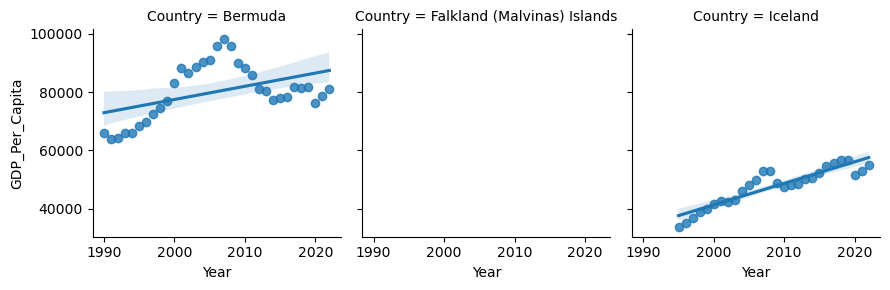

In [75]:
g =sns.FacetGrid(high_internet, col='Country')
g.map_dataframe(sns.regplot, x='Year', y='GDP_Per_Capita')

In [76]:
#22. Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [77]:
gdp_and_internet_use_2014= gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [78]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2014,2144.449634,7.0000
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3000
145,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN
9011,World,2014,15120.730322,NaN
9039,Yemen,2014,NaN,22.5500
9070,Zambia,2014,3375.941270,6.5000


In [79]:
#23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

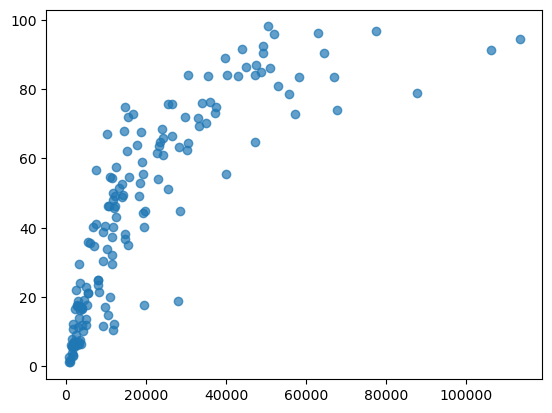

In [80]:
plt.scatter(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_Pct'], alpha=0.7)
plt.xlabel=('GDP Per Capita')
plt.ylabel=('Internet Users Pct')

In [81]:
#24. Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [82]:
gdp_per_capita_2014=gdp_df[gdp_df['Year']== 2014].reset_index(drop=True)

In [83]:
gdp_per_capita_2014

,Country,Year,GDP_Per_Capita
0,Afghanistan,2014,2144.449634
1,Africa Eastern and Southern,2014,3642.875373
2,Africa Western and Central,2014,4146.994622
3,Albania,2014,11586.817446
4,Algeria,2014,11561.259795
...,...,...,...
237,Viet Nam,2014,7641.909252
238,West Bank and Gaza,2014,5967.073437
239,World,2014,15120.730322
240,Zambia,2014,3375.941270


In [84]:
gdp_per_capita_2014['GDP_Group']=pd.qcut(gdp_per_capita_2014['GDP_Per_Capita'],3,['Low','Medium','High'])

In [85]:
gdp_per_capita_2014

,Country,Year,GDP_Per_Capita,GDP_Group
0,Afghanistan,2014,2144.449634,Low
1,Africa Eastern and Southern,2014,3642.875373,Low
2,Africa Western and Central,2014,4146.994622,Low
3,Albania,2014,11586.817446,Medium
4,Algeria,2014,11561.259795,Medium
...,...,...,...,...
237,Viet Nam,2014,7641.909252,Medium
238,West Bank and Gaza,2014,5967.073437,Low
239,World,2014,15120.730322,Medium
240,Zambia,2014,3375.941270,Low


In [86]:
#25. Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [87]:
gdp_per_capita_2014.groupby('GDP_Group', observed=True)['Internet_Users_Pct'].median()

KeyError: 'Column not found: Internet_Users_Pct'